# NYC Project - Data Analysis with Python
**Author:** Abu Bakkar Siddikk
**Date:** 2024-03-06
**Description:** This project is about NYC schools data analysis
**Data Source:** https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4


In [2]:
# Re-run this cell 
import pandas as pd
# Read in the data
schools = pd.read_csv("data/schools.csv")
# Preview first 5 data rows
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [3]:
# Which schools are best for math?
best_math_schools = schools[schools.average_math >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


<Axes: title={'center': 'Best Math Schools'}, xlabel='School Name', ylabel='Average Math Score'>

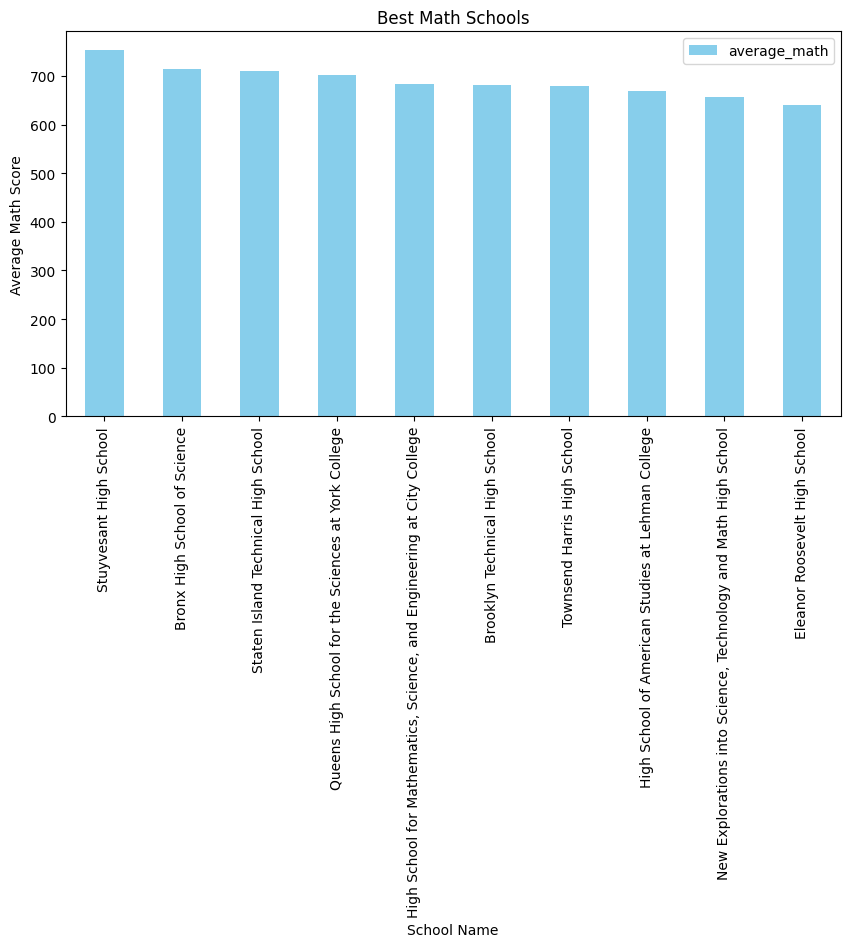

In [4]:
best_math_schools.plot(kind="bar", x="school_name", y="average_math", title="Best Math Schools", xlabel="School Name", ylabel="Average Math Score", figsize=(10, 5), color="skyblue")

In [5]:
# Calculate total_SAT per school
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


In [6]:
# Who are the top 10 performing schools?
top_10_schools = schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


In [ ]:
top_10_schools.plot(kind="bar", x="school_name", y="total_SAT", title="Top 10 Performing Schools", xlabel="School Name", ylabel="Total SAT Score", figsize=(10, 5), color="lightgreen")

In [ ]:
# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)
boroughs

In [ ]:
# Filter for max std and make borough a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]
largest_std_dev

In [ ]:
# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})
largest_std_dev

# Observation
### Which schools are best for math?
      Ans: Stuyvesant High School
   
### Which schools is the top performer?
      Ans: Stuyvesant High School
      
### Which NYC borough has the highest standard deviation for total_SAT?
      Ans: Manhattan